In [584]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
import sklearn
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords

### Wrangling and Analyzing Data

In [585]:
#read the data
#view the top 5 rows of the dataset
df_tweets = pd.read_csv('Tweets.csv')
df_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [586]:
#veiw the bottom 5 rows of the dataset
df_tweets.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [587]:
# size of dataframe (rows, columns)
df_tweets.shape

(14640, 15)

In [588]:
#getting basic information about dataframe
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [589]:
#how many missing data we have in the dataset
df_tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [590]:
df_tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


### Visualizing Data

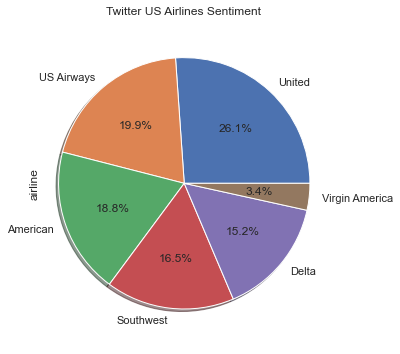

In [626]:
#pie charts

df_tweets.airline.value_counts().plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages    
                            shadow=True,       # add shadow      
                            )

plt.title('Twitter US Airlines Sentiment')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

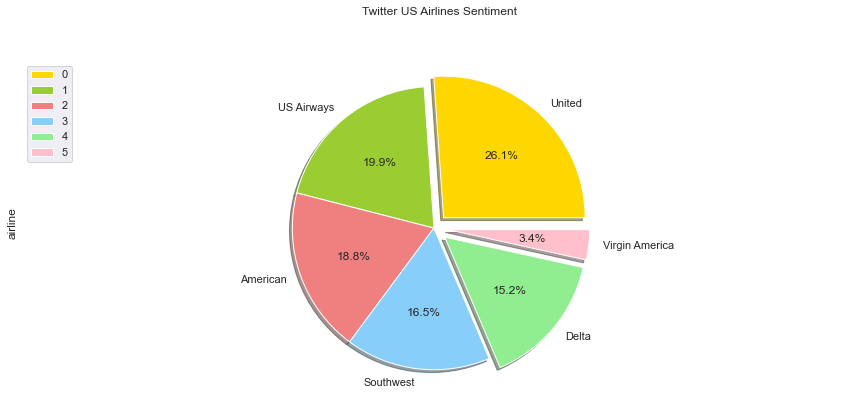

In [631]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] 

df_tweets.airline.value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',     
                            shadow=True,       
                                                   
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Twitter US Airlines Sentiment', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_tweets.index, loc='upper left') 

plt.show()

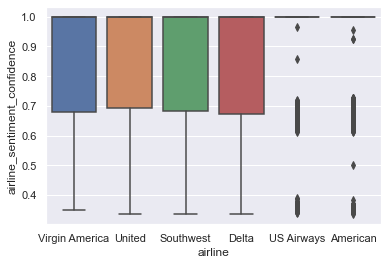

In [593]:
sns.boxplot(x='airline',y='airline_sentiment_confidence',data=df_tweets)

In [594]:
datavis= df_tweets[["airline_sentiment","text","airline","retweet_count"]]
datavis.head()

,airline_sentiment,text,airline,retweet_count
0,neutral,@VirginAmerica What @dhepburn said.,Virgin America,0
1,positive,@VirginAmerica plus you've added commercials t...,Virgin America,0
2,neutral,@VirginAmerica I didn't today... Must mean I n...,Virgin America,0
3,negative,@VirginAmerica it's really aggressive to blast...,Virgin America,0
4,negative,@VirginAmerica and it's a really big bad thing...,Virgin America,0


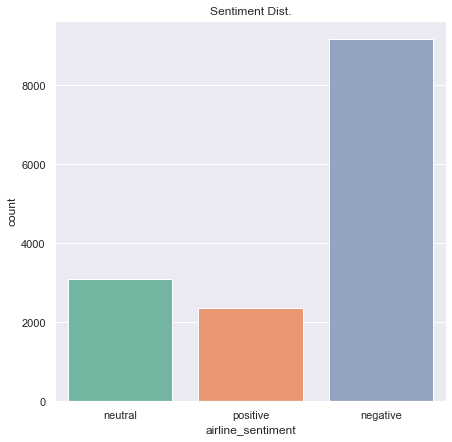

In [595]:
#Visualization with Seaborn set
sns.set()
plt.figure(figsize=(7,7))
sns.countplot(x=datavis["airline_sentiment"],palette="Set2")
plt.title("Sentiment Dist.")
plt.show()


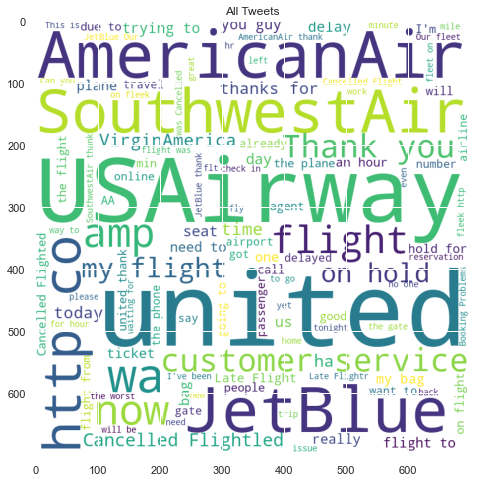

In [596]:
#word cloud all tweets

alltweets = " ".join(df_tweets.text)
wordcloud = WordCloud(width = 700, height = 700, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 12).generate(alltweets) 
      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.title("All Tweets")

plt.show()

In [597]:
#highlight negative tweets

df_tweets.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

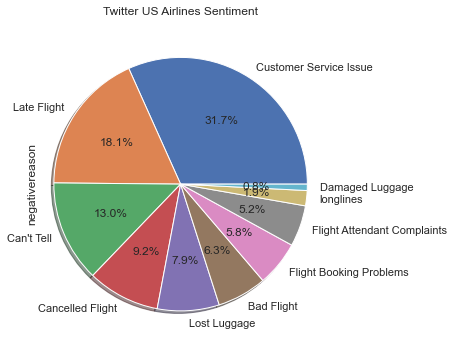

In [598]:
#pie chart negative tweets
df_tweets.negativereason.value_counts().plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages    
                            shadow=True,       # add shadow      
                            )

plt.title('Twitter US Airlines Sentiment')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

This visualization shows us people mostly complain about customer service, than late flight, unknown reasons, cancelled flight, etc.

In [599]:
df_tweets.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

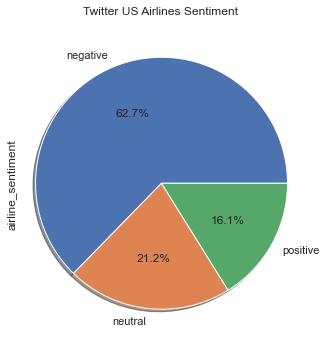

In [600]:
#pie chart airline_sentiment
df_tweets.airline_sentiment.value_counts().plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages    
                            shadow=True,       # add shadow      
                            )

plt.title('Twitter US Airlines Sentiment')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

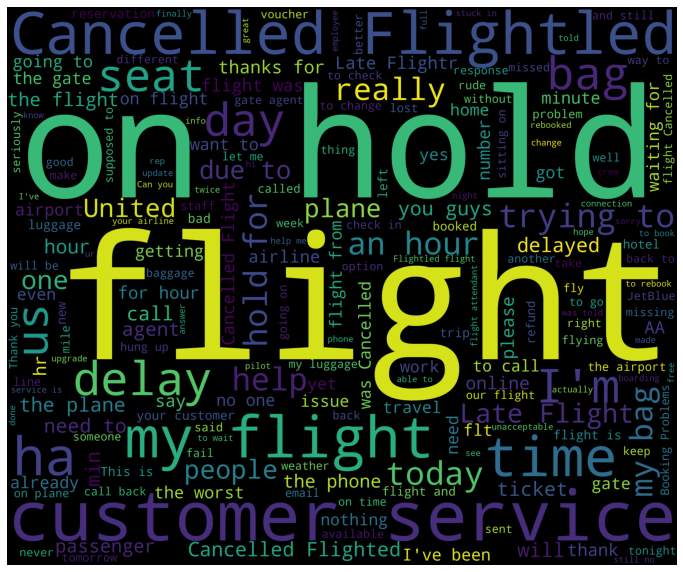

In [601]:
#word cloud negative tweets

neg_df = df_tweets[df_tweets['airline_sentiment']=='negative']
words = ' '.join(neg_df['text'])
stop_words = ["wa", "amp", "now"] + list(STOPWORDS)

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

This visualization of negative sentiment shows people mostly mention the word flight in context flight delay, late, cancelled, my flighr, than words on hold, costumer service, time, etc.

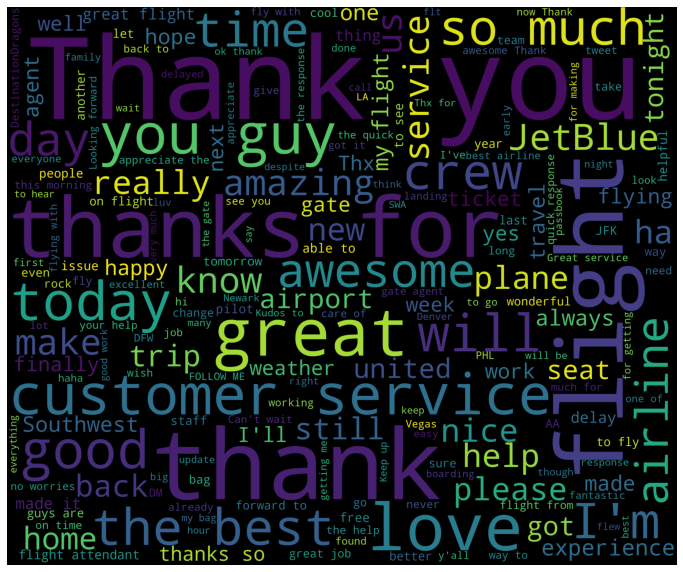

In [602]:
#word cloud positive tweets

poz_df = df_tweets[df_tweets['airline_sentiment']=='positive']
words = ' '.join(poz_df['text'])
stop_words = ["wa", "amp", "now"] + list(STOPWORDS)

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

This visualization of positive sentiment shows people mostly mention words thank you, than great, awesome, good, love, thanks, etc.

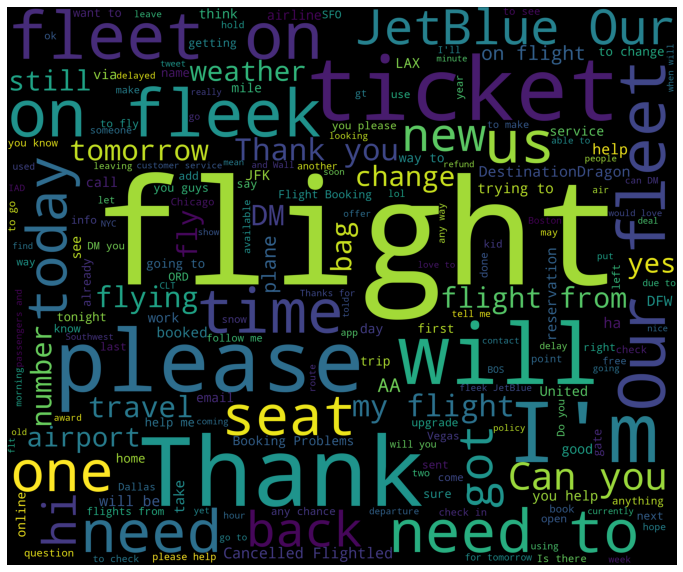

In [603]:
#word cloud neutral tweets

neut_df = df_tweets[df_tweets['airline_sentiment']=='neutral']
words = ' '.join(neut_df['text'])
stop_words = ["wa", "amp", "now"] + list(STOPWORDS)

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

This visualization of neutral sentiment shows people mostly mention words like flighr, thank you, please, can you, need to,  seast, time, number, etc.

### Cledaning data

In [604]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [605]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

### Data preprocessing and selection

In [606]:
df_tweets['sentiment']=df_tweets['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [607]:
df_tweets['clean_tweet']=df_tweets['text'].apply(lambda x: tweet_to_words(x))
df_tweets['Tweet_length']=df_tweets['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(df_tweets,test_size=0.2,random_state=42)

In [608]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

### Train/Test dataset

In [609]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [610]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

### Modeling and evaluatin data

In [611]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

In [624]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))

Accuracy of LogisticRegressionis 0.6451502732240437
Accuracy of KNeighborsClassifieris 0.5891393442622951
Accuracy of SVCis 0.744535519125683
Accuracy of DecisionTreeClassifieris 0.7517076502732241
Accuracy of RandomForestClassifieris 0.8159153005464481


Text(0.5, 1.0, 'Accuracies of Models')

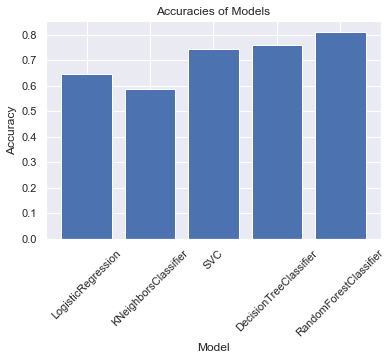

In [614]:
Index = [1,2,3,4,5]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')